#Title of Project
Movie Recommendation System



# Objective
To develop a machine learning model that recommends movies to users based on various attributes like genre, language, budget, popularity, etc.


# Data Source
The dataset provided contains detailed information about movies, including attributes like genre, language, budget, popularity, release date, revenue, runtime, vote, homepage, keywords, overview, production house, production country, spoken language, tagline, cast, crew, and director.It is taken from 'https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv'

# Import Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Import Data

In [39]:
# Load the dataset
url = 'https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv'
data = pd.read_csv(url)


# Describe Data

In [40]:
print(data.head())



   Movie_ID      Movie_Title                       Movie_Genre Movie_Language  \
0         1       Four Rooms                      Crime Comedy             en   
1         2        Star Wars  Adventure Action Science Fiction             en   
2         3     Finding Nemo                  Animation Family             en   
3         4     Forrest Gump              Comedy Drama Romance             en   
4         5  American Beauty                             Drama             en   

   Movie_Budget  Movie_Popularity Movie_Release_Date  Movie_Revenue  \
0       4000000         22.876230         09-12-1995        4300000   
1      11000000        126.393695         25-05-1977      775398007   
2      94000000         85.688789         30-05-2003      940335536   
3      55000000        138.133331         06-07-1994      677945399   
4      15000000         80.878605         15-09-1999      356296601   

   Movie_Runtime  Movie_Vote  ...  \
0           98.0         6.5  ...   
1          1

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [42]:
print(data.describe())

          Movie_ID  Movie_Budget  Movie_Popularity  Movie_Revenue  \
count  4760.000000  4.760000e+03       4760.000000   4.760000e+03   
mean   2382.566387  2.920129e+07         21.599510   8.263743e+07   
std    1377.270159  4.075620e+07         31.887919   1.630554e+08   
min       1.000000  0.000000e+00          0.000372   0.000000e+00   
25%    1190.750000  9.257500e+05          4.807074   0.000000e+00   
50%    2380.500000  1.500000e+07         13.119058   1.944716e+07   
75%    3572.250000  4.000000e+07         28.411929   9.341276e+07   
max    4788.000000  3.800000e+08        875.581305   2.787965e+09   

       Movie_Runtime   Movie_Vote  Movie_Vote_Count  
count    4758.000000  4760.000000       4760.000000  
mean      107.184111     6.113866        692.508403  
std        21.960332     1.141294       1235.007337  
min         0.000000     0.000000          0.000000  
25%        94.000000     5.600000         55.000000  
50%       104.000000     6.200000        238.000000  


# Data Visualization

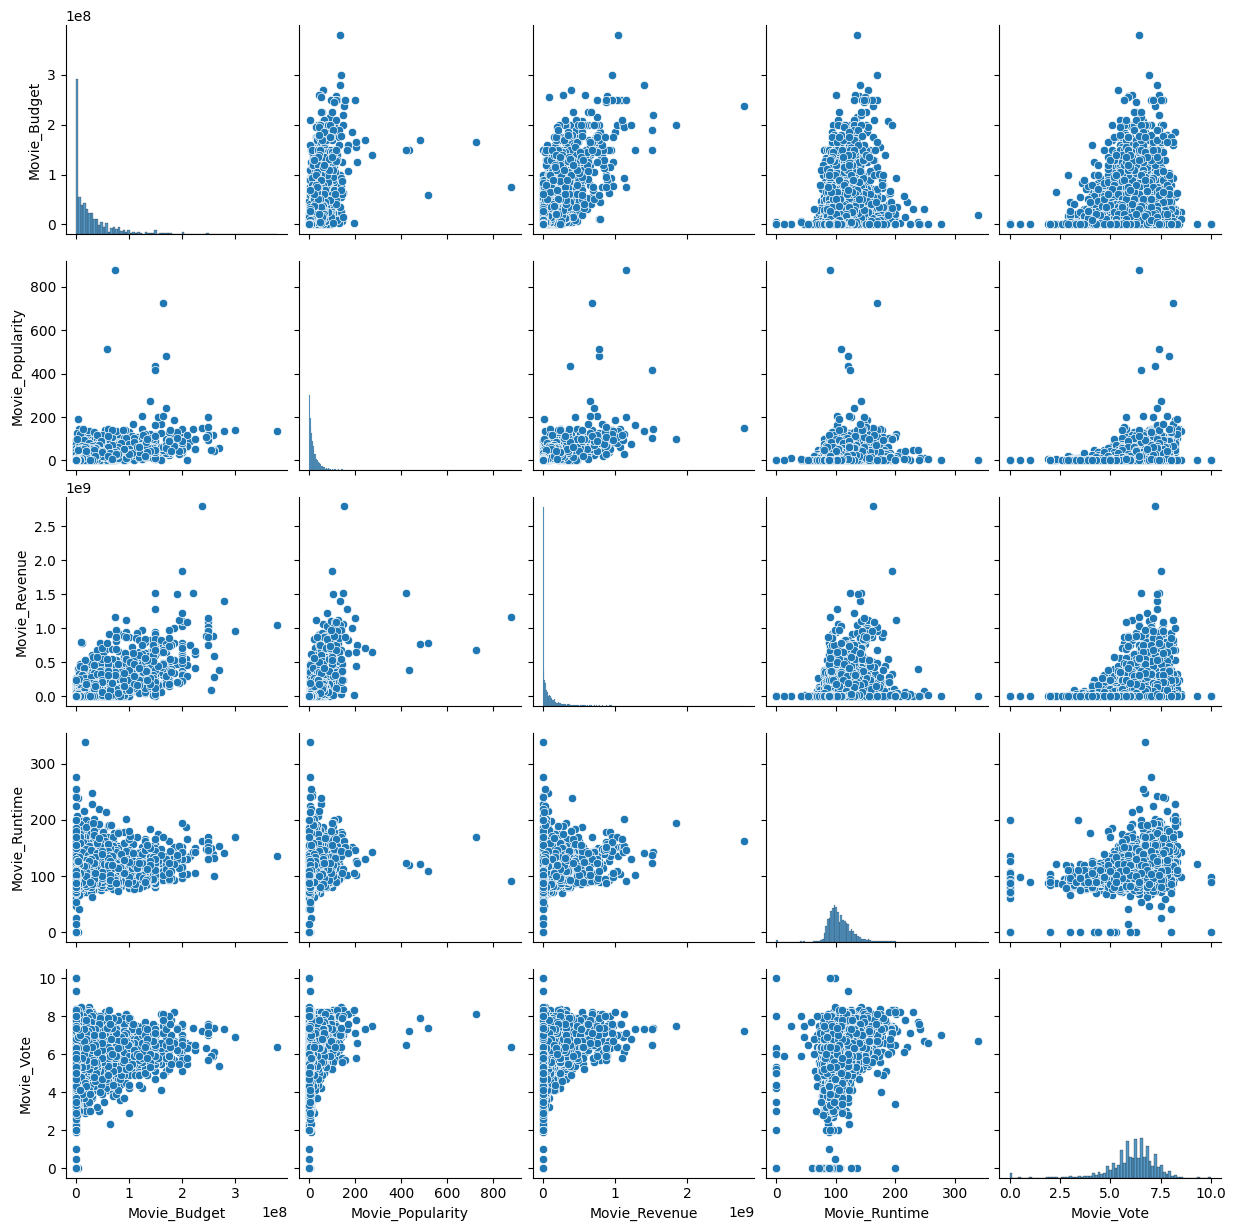

In [43]:
sns.pairplot(data[['Movie_Budget', 'Movie_Popularity', 'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote']])
plt.show()



# Data Preprocessing

In [44]:
# Check the current columns in your dataset
print(data.columns)

# Verify which columns actually exist before attempting to drop them
columns_to_drop = ['Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
                   'Movie_Production_House', 'Movie_Cast', 'Movie_Crew',
                   'Movie_Director', 'Movie_Tagline', 'Movie_Release_Date']

# Filter the columns to drop based on what actually exists in the dataset
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['Movie_Genre', 'Movie_Language', 'Movie_Production_Country', 'Movie_Spoken_Language']
data = pd.get_dummies(data, columns=[col for col in categorical_columns if col in data.columns])

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
numerical_cols = ['Movie_Budget', 'Movie_Popularity', 'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote']
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Ensure all data is numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill any remaining NaNs that may have been introduced
data = data.fillna(0)



Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')


# Define Target Variable (y) and Feature Variables (X)

In [45]:
# Define Target Variable (y) and Feature Variables (X)
X = data.drop(['Movie_Revenue'], axis=1)
y = data['Movie_Revenue']


# Train Test Split

In [54]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [50]:

# Fit the pipeline
from IPython.display import display_html

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Display as HTML
display_html(pipeline)


Pipeline(steps=[('scaler', StandardScaler()),
 ('model', RandomForestRegressor(random_state=42))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   Pipeline ? Documentation for Pipeline i Not fitted Pipeline(steps=[('scaler', StandardScaler()),
 ('model', RandomForestRegressor(random_state=42))])  StandardScaler ? Documentation for StandardScaler StandardScaler()  RandomForestRegressor ? Documentation for RandomForestRegressor RandomForestRegressor(random_state=42)

# Model Evaluation

In [55]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5762802252820415.0


# Prediction

In [56]:
predictions = pipeline.predict(X_test)
print(predictions)

[8.28808000e+03 1.64120234e+08 6.41119707e+08 1.15832349e+08
 1.42301706e+08 2.96988157e+08 4.52516681e+06 2.11560688e+06
 4.35402896e+07 5.48665513e+06 6.91367185e+07 5.62614055e+07
 5.64470492e+06 9.42206610e+07 2.13567944e+07 1.76124287e+06
 6.94015323e+06 9.11028745e+06 5.65905003e+06 4.80000000e+05
 7.25868437e+07 1.26340552e+07 1.61560433e+06 2.37913317e+07
 1.73921907e+07 6.89649601e+06 2.98228113e+07 1.78228281e+08
 3.26463488e+07 1.81414807e+07 7.12620587e+06 4.06326119e+07
 4.98238464e+06 1.46036296e+08 9.66096452e+06 0.00000000e+00
 6.83293592e+07 8.00166732e+06 1.89933645e+06 7.42906275e+07
 1.78368073e+08 4.90275554e+07 1.80315540e+06 0.00000000e+00
 8.81106852e+06 0.00000000e+00 1.53000000e+00 5.50104021e+07
 1.20743990e+07 5.52435108e+08 4.66663128e+06 2.16465543e+07
 6.40713117e+06 9.60110005e+06 1.06352862e+08 0.00000000e+00
 1.39345257e+07 1.73066000e+03 7.59679919e+07 1.47769770e+08
 9.97548500e+07 3.01232096e+07 8.64401576e+07 1.69839567e+06
 1.32285982e+08 3.601468

# Explaination
    Data Loading and Initial Exploration:
        The code starts by importing necessary libraries (pandas, numpy, matplotlib, seaborn) and loading the dataset from the provided URL using pd.read_csv(url).
        It then prints the first few rows (data.head()), information about the dataset (data.info()), and basic statistical summary (data.describe()).

    Data Visualization:
        sns.pairplot(data[['Movie_Budget', 'Movie_Popularity', 'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote']]) creates a pairplot using seaborn to visualize relationships between selected numerical columns (Movie_Budget, Movie_Popularity, etc.).
        plt.show() displays the pairplot.

    Data Preprocessing:
        Column Dropping: It attempts to drop columns that are deemed unnecessary for modeling (Movie_Homepage, Movie_Keywords, etc.). However, it filters out only those columns that actually exist in the dataset to avoid errors.
        One-Hot Encoding: Converts categorical variables (Movie_Genre, Movie_Language, etc.) into numerical format using pandas get_dummies() function.
        Handling Missing Values: Numerical columns (Movie_Budget, Movie_Popularity, etc.) are imputed with mean values using SimpleImputer.
        Data Type Conversion: Ensures all columns are numeric by coercing them using pd.to_numeric() with errors handled as 'coerce' (invalid parsing will be set as NaN).
        NaN Handling: Any remaining NaN values after imputation and type conversion are filled with zeros (data.fillna(0)).

    Modeling:
        Feature Selection: Defines X (features) and y (target variable) where X excludes Movie_Revenue as the target.
        Train-Test Split: Splits the dataset into training and testing sets using train_test_split() from sklearn.model_selection.
        Pipeline Definition: Constructs a Pipeline for scaling (StandardScaler()) and modeling (RandomForestRegressor with 100 estimators and a random state of 42).
        Model Training: Fits the pipeline to the training data (pipeline.fit(X_train, y_train)).

    Model Evaluation and Prediction:
        Model Evaluation: Computes Mean Squared Error (MSE) between actual y_test values and predicted y_pred values using mean_squared_error from sklearn.metrics.
        Prediction: Predicts Movie_Revenue for the test set using the trained pipeline (pipeline.predict(X_test)).

    Output:
        Finally, it prints the MSE and the predictions made by the model on the test data.

This entire process sets up a pipeline for preprocessing, scaling, and modeling using a Random Forest regressor to predict movie revenues based on the provided dataset. Adjustments can be made based on specific needs such as further feature engineering, hyperparameter tuning, or alternative model selection.
